In [1]:
import psycopg2
import pandas as pd

# Define the connection parameters
host = 'localhost'        
port = '5432'             # Default PostgreSQL port
dbname = 'telecom_db'  
user = 'postgres'        
password = 'neba'  

# Establish the connection
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Query to get the data
query = "SELECT * FROM xdr_data;"  # Replace 'xdr_data' with the actual table name

# Load the data into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Check the first few rows of the dataframe
print(df.head())

C:\Users\neba\AppData\Local\Temp\ipykernel_18032\3618137001.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [3]:
# Task 3.1: Aggregate information per customer
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])  # Mode for categorical data

# Aggregate the information per customer (MSISDN/Number)
customer_experience = df.groupby('MSISDN/Number').agg(
    avg_tcp_retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean'),
    avg_rtt=('Avg RTT DL (ms)', 'mean'),
    handset_type=('Handset Type', 'first'),  # Take the most frequent value for handset type
    avg_throughput=('Avg Bearer TP DL (kbps)', 'mean')  # Assuming throughput is the download throughput
).reset_index()

# Check the aggregated customer experience data
print(customer_experience.head())

   MSISDN/Number  avg_tcp_retransmission     avg_rtt  \
0   3.360100e+10            2.080991e+07   46.000000   
1   3.360100e+10            2.080991e+07   30.000000   
2   3.360100e+10            2.080991e+07  109.795706   
3   3.360101e+10            1.066000e+03   69.000000   
4   3.360101e+10            1.507977e+07   57.000000   

                     handset_type  avg_throughput  
0  Huawei P20 Lite Huawei Nova 3E            37.0  
1          Apple iPhone 7 (A1778)            48.0  
2                       undefined            48.0  
3         Apple iPhone 5S (A1457)           204.0  
4         Apple iPhone Se (A1723)         20197.5  


In [4]:
# TCP values
top_tcp_values = df['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
bottom_tcp_values = df['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
most_frequent_tcp_values = df['TCP DL Retrans. Vol (Bytes)'].mode()

# RTT values
top_rtt_values = df['Avg RTT DL (ms)'].nlargest(10)
bottom_rtt_values = df['Avg RTT DL (ms)'].nsmallest(10)
most_frequent_rtt_values = df['Avg RTT DL (ms)'].mode()

# Throughput values
top_throughput_values = df['Avg Bearer TP DL (kbps)'].nlargest(10)
bottom_throughput_values = df['Avg Bearer TP DL (kbps)'].nsmallest(10)
most_frequent_throughput_values = df['Avg Bearer TP DL (kbps)'].mode()

# Display results
print("Top 10 TCP Retransmission Values:")
print(top_tcp_values)
print("\nBottom 10 TCP Retransmission Values:")
print(bottom_tcp_values)
print("\nMost Frequent TCP Retransmission Values:")
print(most_frequent_tcp_values)

print("\nTop 10 RTT Values:")
print(top_rtt_values)
print("\nBottom 10 RTT Values:")
print(bottom_rtt_values)
print("\nMost Frequent RTT Values:")
print(most_frequent_rtt_values)

print("\nTop 10 Throughput Values:")
print(top_throughput_values)
print("\nBottom 10 Throughput Values:")
print(bottom_throughput_values)
print("\nMost Frequent Throughput Values:")
print(most_frequent_throughput_values)

Top 10 TCP Retransmission Values:
77979     4.294426e+09
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119684    4.275259e+09
39637     4.268432e+09
76990     4.259997e+09
59016     4.256650e+09
41209     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP Retransmission Values:
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent TCP Retransmission Values:
0    2.080991e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Top 10 RTT Values:
30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81274     25602.0
97321     25374.0
100584    24733.0
Name: Avg RTT DL (ms), dtype: float64

Bottom 10 RTT Values:
42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328    0.0
124

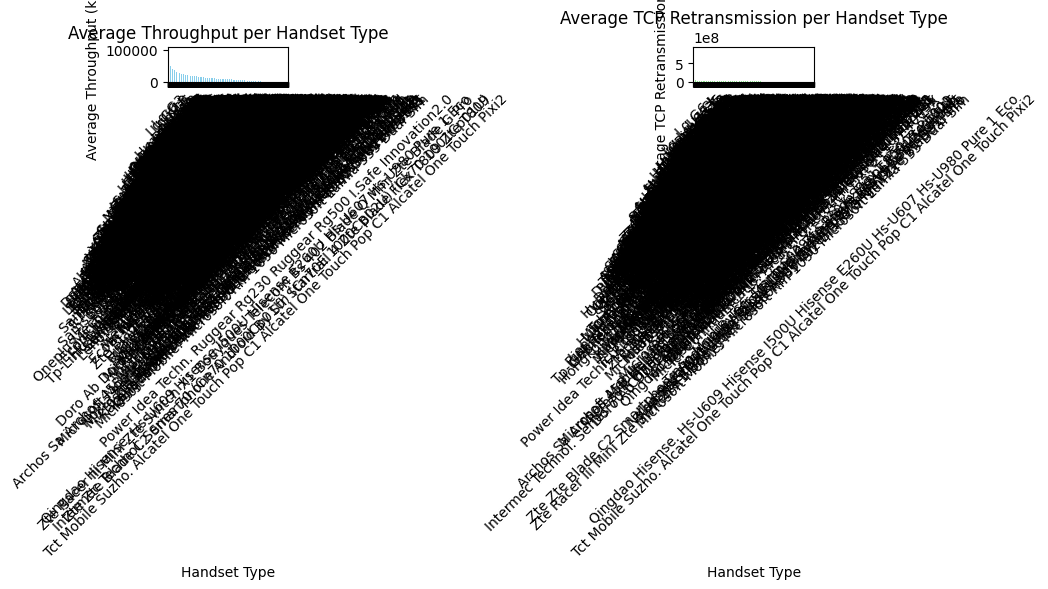

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Distribution of average throughput per handset type
throughput_per_handset = customer_experience.groupby('handset_type')['avg_throughput'].mean().sort_values(ascending=False)

# Average TCP retransmission per handset type
tcp_retransmission_per_handset = customer_experience.groupby('handset_type')['avg_tcp_retransmission'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot for average throughput per handset type
plt.subplot(1, 2, 1)
throughput_per_handset.plot(kind='bar', color='skyblue')
plt.title('Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.xticks(rotation=45)

# Plot for average TCP retransmission per handset type
plt.subplot(1, 2, 2)
tcp_retransmission_per_handset.plot(kind='bar', color='lightgreen')
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# Handle missing values by replacing them with the mean (without using inplace=True)
customer_experience['avg_throughput'] = customer_experience['avg_throughput'].fillna(customer_experience['avg_throughput'].mean())
customer_experience['avg_tcp_retransmission'] = customer_experience['avg_tcp_retransmission'].fillna(customer_experience['avg_tcp_retransmission'].mean())

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant columns for clustering
X = customer_experience[['avg_throughput', 'avg_tcp_retransmission']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_experience['cluster'] = kmeans.fit_predict(X_scaled)

# View the cluster centers
print(kmeans.cluster_centers_)

[[ 1.82005744e+00 -5.17596296e-03]
 [-3.80562058e-01 -3.94802803e-02]
 [ 2.48497102e+00  2.25510628e+01]]


In [11]:
# Aggregate metrics by cluster
cluster_summary = customer_experience.groupby('cluster').agg({
    'avg_throughput': ['mean', 'min', 'max', 'sum'],
    'avg_tcp_retransmission': ['mean', 'min', 'max', 'sum']
}).reset_index()

# Display the summary
print(cluster_summary)

  cluster avg_throughput                                   \
                    mean      min       max           sum   
0       0   49107.673027  25373.0  264448.0  8.984740e+08   
1       1    3786.124871      0.0   26520.0  3.346972e+08   
2       2   62838.408386  15243.0  141361.0  9.991307e+06   

  avg_tcp_retransmission                                            
                    mean           min           max           sum  
0           1.961624e+07  3.100000e+01  1.118514e+09  3.588987e+11  
1           1.624964e+07  2.000000e+00  1.068447e+09  1.436484e+12  
2           2.224330e+09  1.131088e+09  4.289488e+09  3.536685e+11  
